In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('cancer.csv')

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [6]:
df.drop(columns = ['id'] ,inplace=True)

# EDA

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
encoder = LabelEncoder()
df['diagnosis'] = encoder.fit_transform(df['diagnosis'])

In [9]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [10]:
df.rename(columns = {"diagnosis" : "target"} , inplace=True)

In [11]:
df.sample()

,target,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
390,0,10.26,12.22,65.75,321.6,0.09996,0.07542,0.01923,0.01968,0.18,...,11.38,15.65,73.23,394.5,0.1343,0.165,0.08615,0.06696,0.2937,0.07722


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

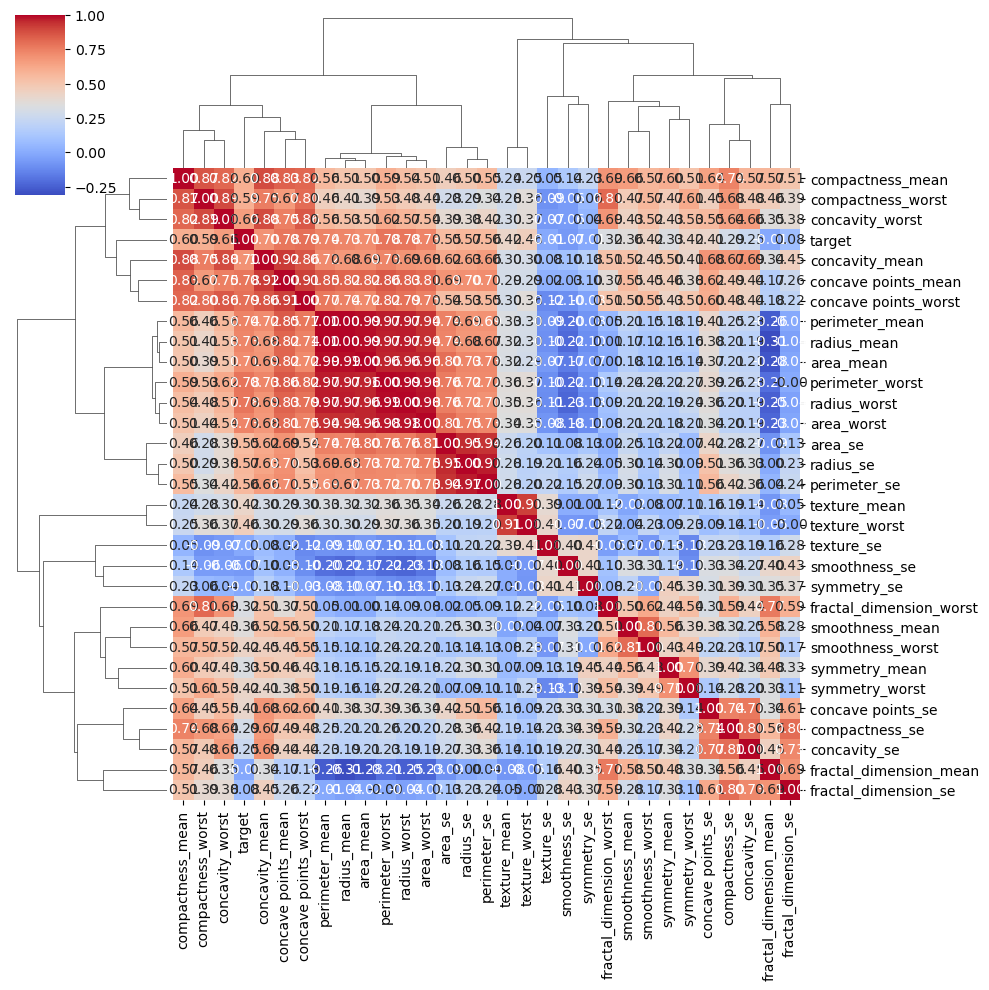

In [13]:
correlation_matrix = df.corr()
sns.clustermap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

In [14]:
# Its very tough to understand the correlation from this 

# lets try something else

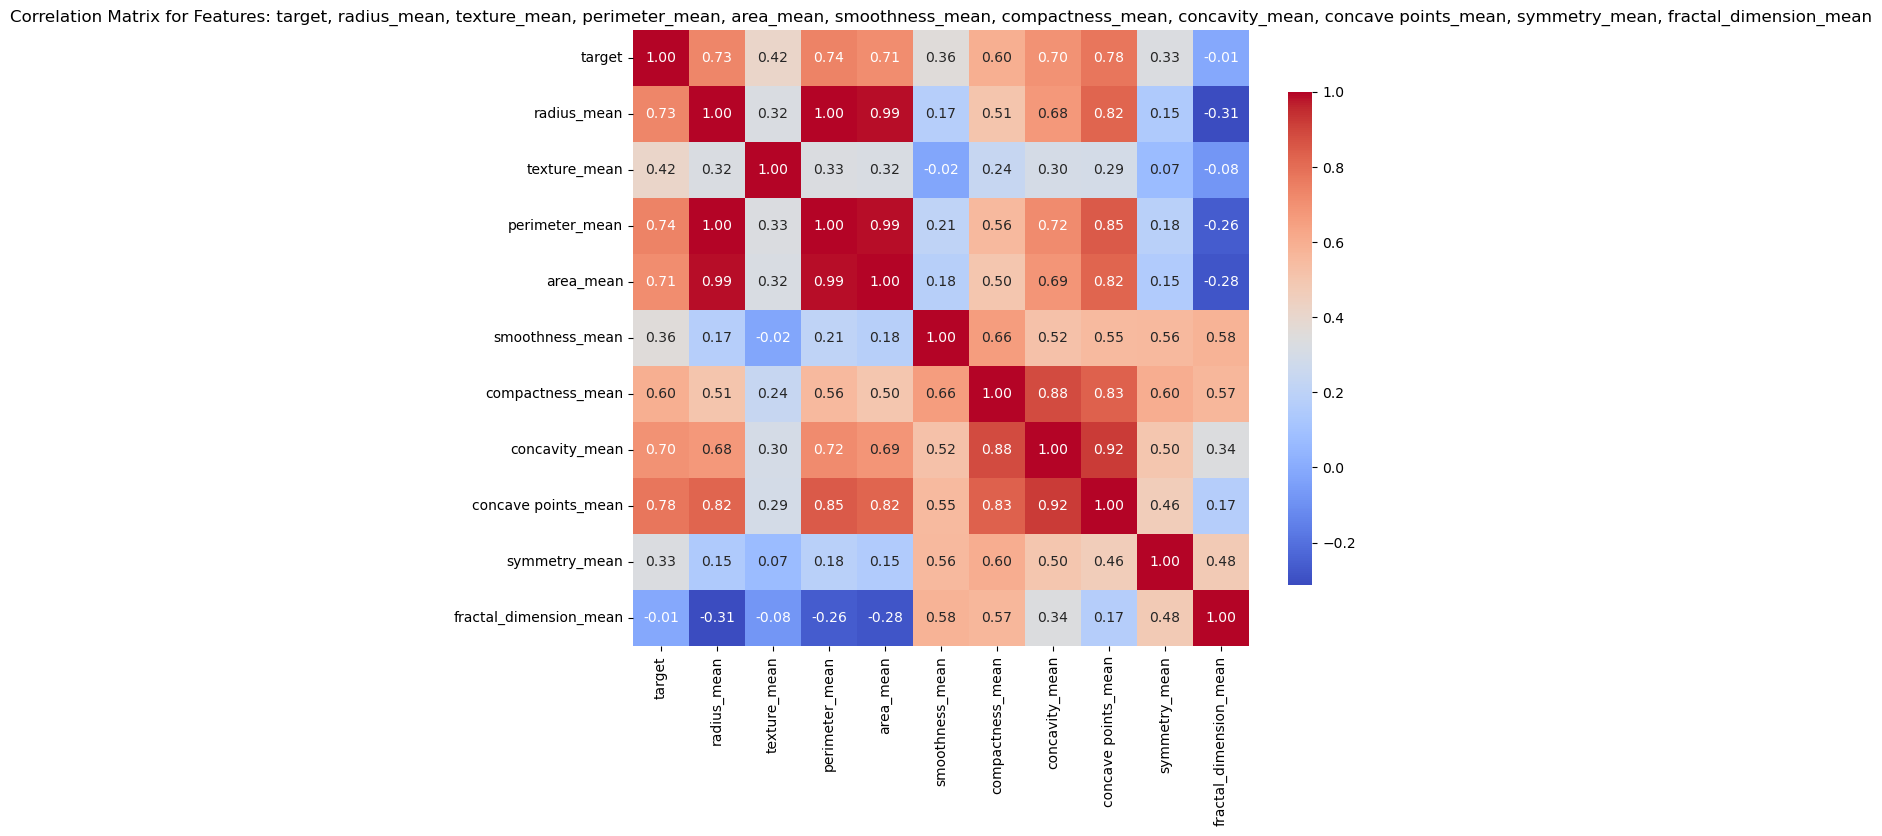

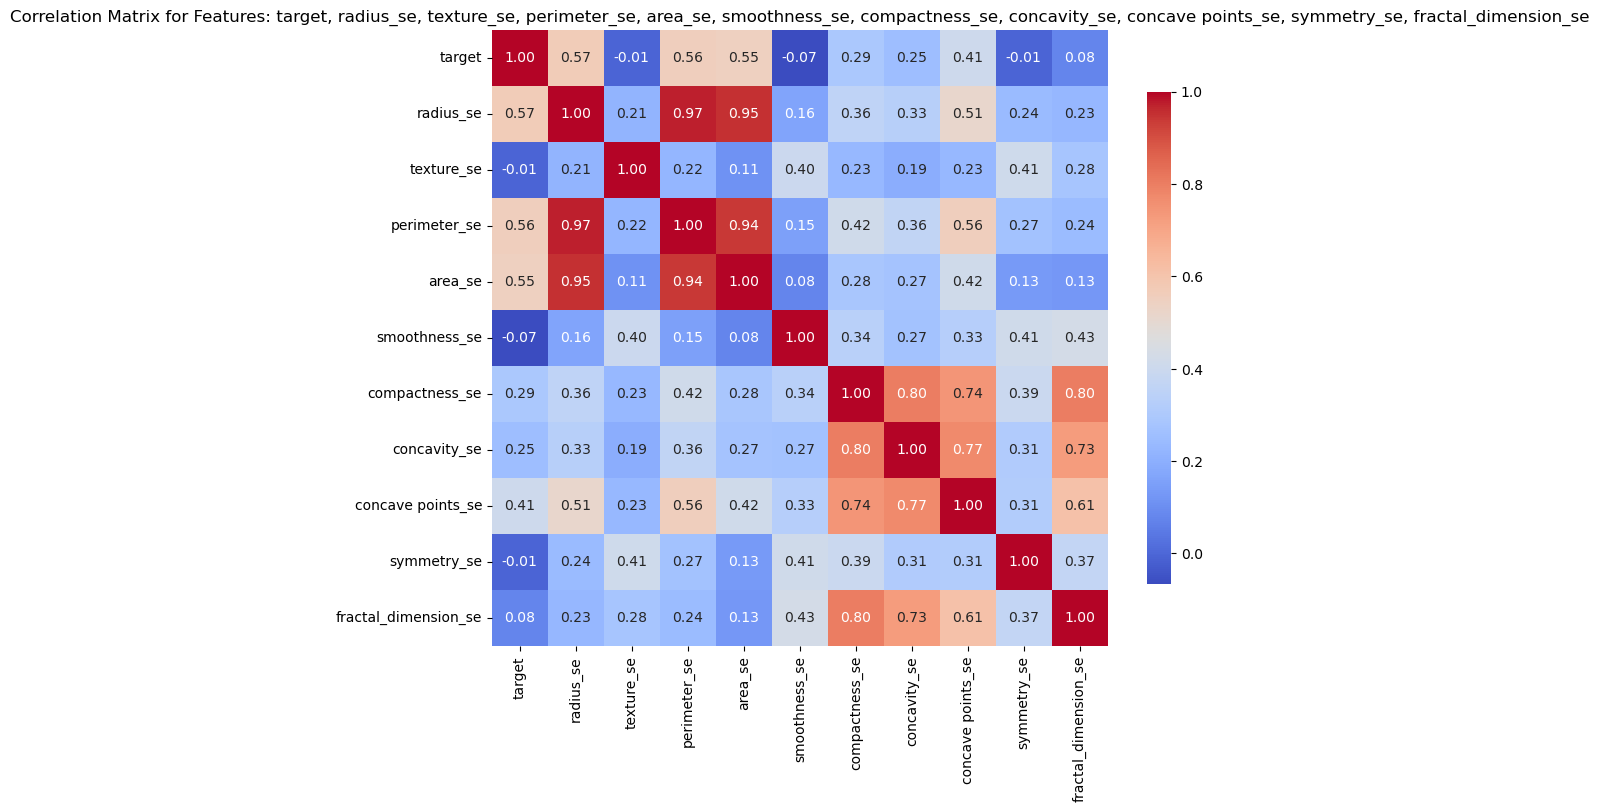

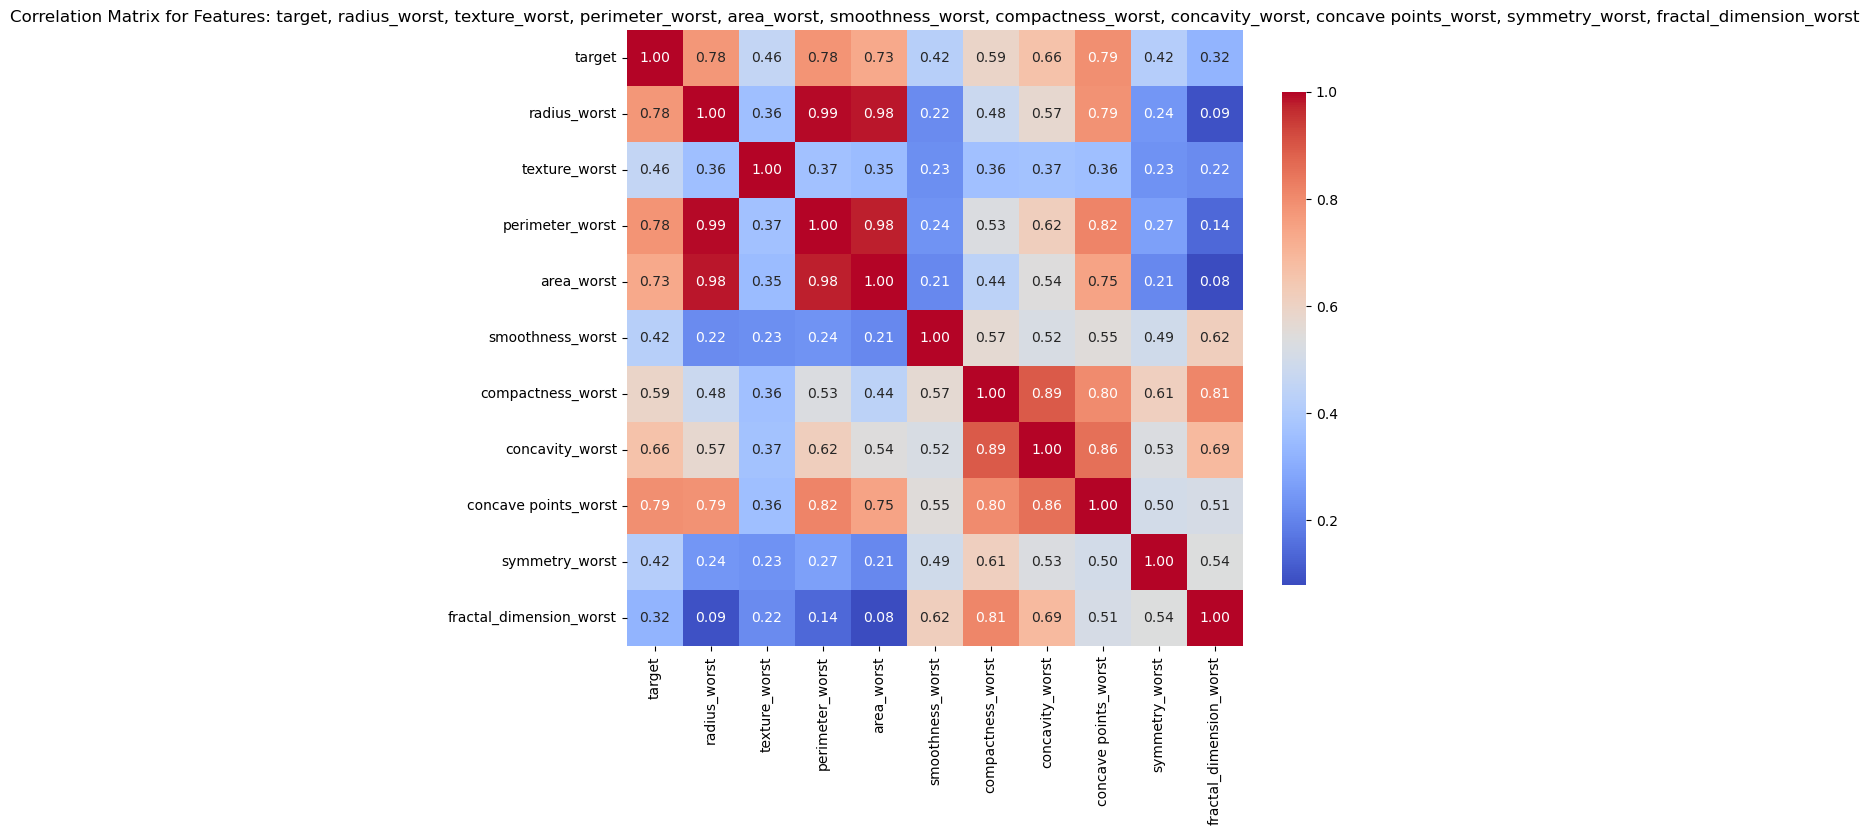

In [15]:
target = df.columns[0]
features = df.columns[1:].tolist() 

def plot_correlation_matrix(df, feature_subset):
    feature_subset_with_target = [target] + feature_subset
    correlation_matrix = df[feature_subset_with_target].corr()
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
    plt.title(f'Correlation Matrix for Features: {", ".join(feature_subset_with_target)}')
    plt.show()

for i in range(0, len(features), 10):
    subset = features[i:i + 10]
    plot_correlation_matrix(df, subset)


In [16]:
df.drop(columns = {"fractal_dimension_mean" ,"symmetry_mean" ,"smoothness_mean" , "texture_mean" , "fractal_dimension_se" , 
                     "symmetry_se" , "concave points_se" , "concavity_se" , "compactness_se" , "smoothness_se" , "texture_se" ,
                     "fractal_dimension_worst" , "symmetry_worst" , "smoothness_worst", "compactness_worst" , "texture_worst"} , 
                   inplace = True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   target                569 non-null    int32  
 1   radius_mean           569 non-null    float64
 2   perimeter_mean        569 non-null    float64
 3   area_mean             569 non-null    float64
 4   compactness_mean      569 non-null    float64
 5   concavity_mean        569 non-null    float64
 6   concave points_mean   569 non-null    float64
 7   radius_se             569 non-null    float64
 8   perimeter_se          569 non-null    float64
 9   area_se               569 non-null    float64
 10  radius_worst          569 non-null    float64
 11  perimeter_worst       569 non-null    float64
 12  area_worst            569 non-null    float64
 13  concavity_worst       569 non-null    float64
 14  concave points_worst  569 non-null    float64
dtypes: float64(14), int32(1

In [18]:
# Now lets try to train data on this dataset

# Train the Model

In [19]:
X = df.drop(columns = ['target'])
y = df['target']

In [20]:
X.shape

(569, 14)

In [21]:
y.shape

(569,)

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 2)

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier

In [25]:
lr = LogisticRegression()
knc = KNeighborsClassifier(n_neighbors=5)
svc = SVC(kernel='linear')
dtc = DecisionTreeClassifier(max_depth=5)
rfc = RandomForestClassifier(n_estimators=50 ,random_state=2)
gbc = GradientBoostingClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50 , random_state=2)
bc = BaggingClassifier(n_estimators=50  ,random_state=2)
etc= ExtraTreesClassifier(n_estimators=50 , random_state=2)
xgb = XGBClassifier(n_estimators =50 , random_state=2)

In [26]:
clfs = {
    'LR' : lr,
    'KNC': knc,
    'SVC': svc,
    'DTC': dtc,
    'RFC': rfc,
    'GBC': gbc,
     'AdaBoost' : abc ,
    'Bgc' : bc ,
    'ETC' : etc ,
    'xgb' : xgb
}

In [27]:
def train_classifier(clf, train_X ,train_y , test_X , test_y):
    clf.fit(train_X , train_y)
    y_pred = clf.predict(test_X)
    accuracy = accuracy_score(test_y , y_pred)
    y_train_pred = clf.predict(train_X)
    train_accuracy = accuracy_score(train_y , y_train_pred)

    return accuracy , train_accuracy

In [28]:
from sklearn.metrics import accuracy_score

In [29]:
accuracy_scores = []
training_scores = []

for name ,clf in  clfs.items():
    current_accuracy , train_accuracy = train_classifier(clf, X_train,y_train,X_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Training Accuracy - ",train_accuracy)

    accuracy_scores.append(current_accuracy)
    training_scores.append(train_accuracy)

C:\Users\dubey\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


For  LR
Accuracy -  0.9122807017543859
Training Accuracy -  0.9538461538461539
For  KNC
Accuracy -  0.9122807017543859
Training Accuracy -  0.9538461538461539
For  SVC
Accuracy -  0.9210526315789473
Training Accuracy -  0.9538461538461539
For  DTC
Accuracy -  0.9298245614035088
Training Accuracy -  0.9846153846153847
For  RFC
Accuracy -  0.9298245614035088
Training Accuracy -  1.0
For  GBC
Accuracy -  0.9385964912280702
Training Accuracy -  0.9978021978021978
For  AdaBoost
Accuracy -  0.9298245614035088
Training Accuracy -  1.0
For  Bgc
Accuracy -  0.9473684210526315
Training Accuracy -  1.0
For  ETC
Accuracy -  0.9298245614035088
Training Accuracy -  1.0
For  xgb
Accuracy -  0.9298245614035088
Training Accuracy -  1.0


In [30]:
# Okey , lets try to ignore some more features

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   target                569 non-null    int32  
 1   radius_mean           569 non-null    float64
 2   perimeter_mean        569 non-null    float64
 3   area_mean             569 non-null    float64
 4   compactness_mean      569 non-null    float64
 5   concavity_mean        569 non-null    float64
 6   concave points_mean   569 non-null    float64
 7   radius_se             569 non-null    float64
 8   perimeter_se          569 non-null    float64
 9   area_se               569 non-null    float64
 10  radius_worst          569 non-null    float64
 11  perimeter_worst       569 non-null    float64
 12  area_worst            569 non-null    float64
 13  concavity_worst       569 non-null    float64
 14  concave points_worst  569 non-null    float64
dtypes: float64(14), int32(1

In [32]:
df.drop(columns = {"concavity_worst" , "area_se" , "perimeter_se" , "radius_se" , "compactness_mean"} , inplace=True)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   target                569 non-null    int32  
 1   radius_mean           569 non-null    float64
 2   perimeter_mean        569 non-null    float64
 3   area_mean             569 non-null    float64
 4   concavity_mean        569 non-null    float64
 5   concave points_mean   569 non-null    float64
 6   radius_worst          569 non-null    float64
 7   perimeter_worst       569 non-null    float64
 8   area_worst            569 non-null    float64
 9   concave points_worst  569 non-null    float64
dtypes: float64(9), int32(1)
memory usage: 42.4 KB


<Axes: >

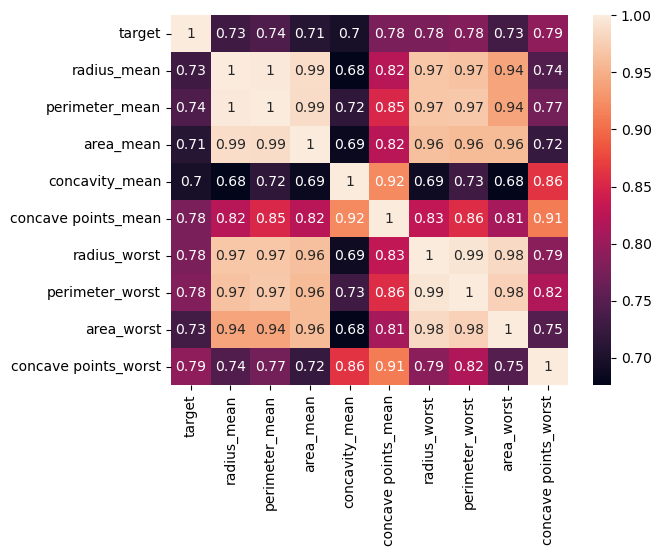

In [34]:
sns.heatmap(df.corr(),annot=True)

In [35]:
X = df.drop(columns = ['target'])
y = df['target']

In [36]:
print(X.shape)
print(y.shape)

(569, 9)
(569,)


In [37]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 2)

In [38]:
accuracy_scores = []
training_scores = []

for name ,clf in  clfs.items():
    current_accuracy , train_accuracy = train_classifier(clf, X_train,y_train,X_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Training Accuracy - ",train_accuracy)

    accuracy_scores.append(current_accuracy)
    training_scores.append(train_accuracy)

For  LR
Accuracy -  0.9122807017543859
Training Accuracy -  0.9516483516483516
For  KNC
Accuracy -  0.9122807017543859
Training Accuracy -  0.9538461538461539


C:\Users\dubey\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


For  SVC
Accuracy -  0.9122807017543859
Training Accuracy -  0.9560439560439561
For  DTC
Accuracy -  0.9385964912280702
Training Accuracy -  0.9846153846153847
For  RFC
Accuracy -  0.9385964912280702
Training Accuracy -  1.0
For  GBC
Accuracy -  0.9298245614035088
Training Accuracy -  0.9978021978021978
For  AdaBoost
Accuracy -  0.9473684210526315
Training Accuracy -  1.0
For  Bgc
Accuracy -  0.9473684210526315
Training Accuracy -  1.0
For  ETC
Accuracy -  0.9385964912280702
Training Accuracy -  1.0
For  xgb
Accuracy -  0.9473684210526315
Training Accuracy -  1.0


In [39]:
# I think these remaining features are good

In [40]:
performance_df = pd.DataFrame({'Algorithms' : clfs.keys() , 'Accuracy':accuracy_scores , 'Training' : training_scores})

In [41]:
performance_df

,Algorithms,Accuracy,Training
0,LR,0.912281,0.951648
1,KNC,0.912281,0.953846
2,SVC,0.912281,0.956044
3,DTC,0.938596,0.984615
4,RFC,0.938596,1.000000
5,GBC,0.929825,0.997802
6,AdaBoost,0.947368,1.000000
7,Bgc,0.947368,1.000000
8,ETC,0.938596,1.000000
9,xgb,0.947368,1.000000


In [42]:
performance_df_sorted = performance_df.sort_values(by="Accuracy" ,ascending = False )

In [43]:
performance_df_sorted

,Algorithms,Accuracy,Training
6,AdaBoost,0.947368,1.000000
7,Bgc,0.947368,1.000000
9,xgb,0.947368,1.000000
3,DTC,0.938596,0.984615
4,RFC,0.938596,1.000000
8,ETC,0.938596,1.000000
5,GBC,0.929825,0.997802
0,LR,0.912281,0.951648
1,KNC,0.912281,0.953846
2,SVC,0.912281,0.956044


In [44]:
from sklearn.model_selection import cross_val_score

In [45]:
cv_results = {}

for name, clf in clfs.items():
    scores = cross_val_score(clf, X, y, cv=5)  
    cv_results[name] = scores
    print(f"{name}: Cross-Validated Accuracy - Mean: {np.mean(scores):.4f}, Std: {np.std(scores):.4f}")

C:\Users\dubey\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\dubey\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

LR: Cross-Validated Accuracy - Mean: 0.9473, Std: 0.0124
KNC: Cross-Validated Accuracy - Mean: 0.9227, Std: 0.0285
SVC: Cross-Validated Accuracy - Mean: 0.9455, Std: 0.0140
DTC: Cross-Validated Accuracy - Mean: 0.9209, Std: 0.0156
RFC: Cross-Validated Accuracy - Mean: 0.9456, Std: 0.0244
GBC: Cross-Validated Accuracy - Mean: 0.9350, Std: 0.0239
AdaBoost: Cross-Validated Accuracy - Mean: 0.9385, Std: 0.0337
Bgc: Cross-Validated Accuracy - Mean: 0.9455, Std: 0.0256
ETC: Cross-Validated Accuracy - Mean: 0.9508, Std: 0.0275
xgb: Cross-Validated Accuracy - Mean: 0.9403, Std: 0.0274


In [46]:
# Ok here we can see that we got cross val score of "94" on logistic regression and we have training score of almost 95 on it
# so we will go with logistic regression

In [47]:
from sklearn.model_selection import GridSearchCV

In [48]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  'penalty': ['l1', 'l2', 'elasticnet', 'none'],  'solver': ['liblinear', 'saga'] }

grid_search = GridSearchCV(estimator=lr, param_grid=param_grid , scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

print("Best Parameters: ", grid_search.best_params_)
print("Best Cross-Validation Accuracy: ", grid_search.best_score_)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best Parameters:  {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best Cross-Validation Accuracy:  0.964835164835165


C:\Users\dubey\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
75 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\dubey\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\dubey\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\dubey\anaconda3\Lib\site-packages\sklearn\linear_model\_l

In [49]:
final_model = LogisticRegression(C = 100,penalty= 'l1', solver= 'liblinear')

In [50]:
final_model.fit(X_train , y_train)

C:\Users\dubey\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LogisticRegression(C=100, penalty='l1', solver='liblinear')

In [51]:
final_pred = final_model.predict(X_test)

In [52]:
print(accuracy_score(y_test ,final_pred))

0.9298245614035088


In [54]:
param_grid = {
    'n_estimators': [50, 100, 200],        
    'max_depth': [None, 5, 10, 15],        
    'min_samples_split': [2, 5, 10],       
    'min_samples_leaf': [1, 2, 4]          
}

rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           scoring='accuracy', cv=5, n_jobs=-1, verbose=1)

grid_search.fit(X_train, y_train)

print("Best Parameters: ", grid_search.best_params_)
print("Best Cross-Validation Accuracy: ", grid_search.best_score_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best Cross-Validation Accuracy:  0.9516483516483516


In [55]:
rf = RandomForestClassifier(max_depth= None, min_samples_leaf =  1, min_samples_split =  2, n_estimators = 50 , random_state=42)


In [56]:
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=42)

In [57]:
rf.score(X_test, y_test)

0.9298245614035088

In [58]:
rf.score(X_train , y_train)

1.0

In [59]:
# So its still giving the training score 100 percent, 
# so i think we should go with Logisstic Classification

In [60]:
final_model.score(X_test , y_test)

0.9298245614035088

In [61]:
# yeah so i'm going with this one

# Logistic Regression -> Final Model
* Test accuracy - 93 %
* Train accuracy - 95 %
* Cross val score - 94 %

In [63]:
import pickle
pickle.dump(final_model , open('model.pkl' , 'wb'))